In [1]:
import cv2, sys
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
os.chdir('/MVTec/MVTec/bottle/test/broken_large')

In [3]:
os.listdir(os.getcwd())

['001.png',
 '014.png',
 '016.png',
 '011.png',
 '008.png',
 '003.png',
 '015.png',
 '012.png',
 '013.png',
 '009.png',
 '010.png',
 '006.png',
 '019.png',
 '004.png',
 '000.png',
 '017.png',
 '018.png',
 '007.png',
 '005.png',
 '002.png']

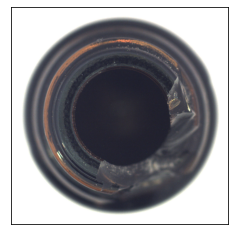

In [5]:
image = cv2.imread('000.png')

#b,g,r = cv2.split(image)
image2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image2)
plt.xticks([])
plt.yticks([])
plt.show()

len(contorus)= 1
maxLength= 2662.164764046669
area= 494721.0
57 56 789 799


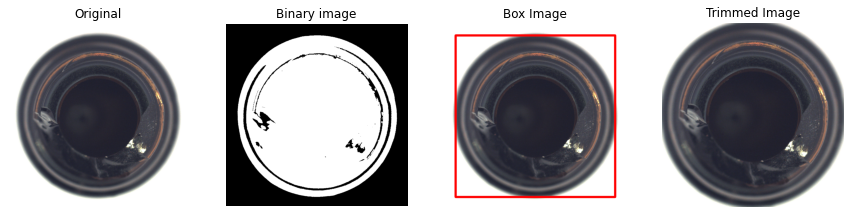

In [17]:
src = cv2.imread('001.png')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
ret, bimage = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)
bimage = cv2.dilate(bimage, None)

mode = cv2.RETR_EXTERNAL
method = cv2.CHAIN_APPROX_SIMPLE
contours, hierarchy = cv2.findContours(bimage,mode,method)
print('len(contorus)=',len(contours))

maxLength=0
k=0
for i,cnt in enumerate(contours):
    perimeter = cv2.arcLength(cnt,closed=True)
    if perimeter > maxLength:
        maxLength = perimeter
        k=i
print('maxLength=',maxLength)
cnt = contours[k]
dst2 = src.copy()

area = cv2.contourArea(cnt)
print('area=',area)
x,y,width,height = cv2.boundingRect(cnt)
print(x, y, width, height)
dst3 = dst2.copy()
cv2.rectangle(dst3,(x,y),(x+width,y+height),(255,0,0), 10)

dst4 = src.copy()
dst4 = dst4[y:y+height, x:x+width]

plt.figure(figsize = (15, 15))

imgae1 = plt.subplot(1, 4, 1)
imgae1.set_title("Original")
plt.axis('off')
plt.imshow(src)

imgae2 = plt.subplot(1, 4, 2)
imgae2.set_title('Binary image')
plt.axis('off')
plt.imshow(bimage, cmap = 'gray')

imgae3 = plt.subplot(1, 4, 3)
imgae3.set_title('Box Image')
plt.axis('off')
plt.imshow(dst3)

imgae4 = plt.subplot(1, 4, 4)
imgae4.set_title('Trimmed Image')
plt.axis('off')
plt.imshow(dst4)

plt.show()